In [14]:
import pandas as pd
import csv
from datetime import datetime


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
df = pd.read_csv("data_internet/climate-change_som.csv", on_bad_lines='skip')

In [4]:
data_prev = pd.read_excel("2021-post-gu-amn-burden-and-prevalence-9-sep-2021.xlsx")

In [5]:
# df['Indicator Name'].unique()
# Also get soil moisture, and perception, NDVI

In [51]:
climate = ['Average precipitation in depth (mm per year)',
          'CO2 emissions from gaseous fuel consumption (% of total)',
          'CO2 emissions from liquid fuel consumption (% of total)',
          'Total greenhouse gas emissions (kt of CO2 equivalent)',
          'Methane emissions (kt of CO2 equivalent)',
          'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
          'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
          'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
          'Annual freshwater withdrawals, total (% of internal resources)',
          'Terrestrial and marine protected areas (% of total territorial area)',
          'Agriculture, forestry, and fishing, value added (% of GDP)']

In [52]:
climate_df = df[df['Indicator Name'].isin(climate)]
climate_df['ValueYear'] = pd.to_datetime(climate_df['Year'])
climate_dff = climate_df


<ipython-input-52-1e41e128d71a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_df['ValueYear'] = pd.to_datetime(climate_df['Year'])


In [59]:
def build_graphs(var):
    df = climate_dff.loc[climate_dff['Indicator Name'] == '{}'.format(var)]
    
    try:
        df['Value'] = [float(i) for i in df['Value']]
    except:
        df['Value'] = [int(i) for i in df['Value']]
    else:
        print("Didn't converge")
    
    df = df[['Value', 'ValueYear']]


    df.plot('ValueYear','Value',figsize=(5,6))
    plt.title("{} over time".format(var))
    plt.show()
    

<ipython-input-59-d6f961462628>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = [float(i) for i in df['Value']]


Didn't converge


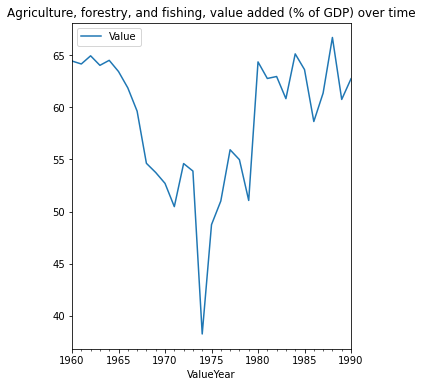

In [60]:
build_graphs('Agriculture, forestry, and fishing, value added (% of GDP)')

<ipython-input-59-d6f961462628>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = [float(i) for i in df['Value']]


Didn't converge


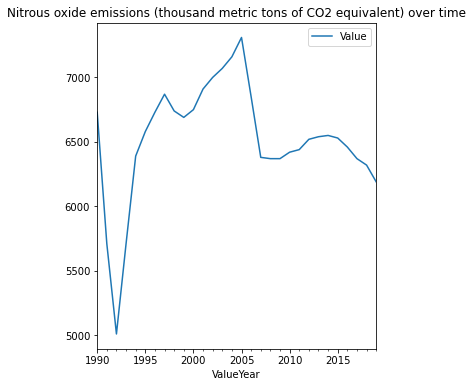

In [61]:
build_graphs('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)')

<ipython-input-59-d6f961462628>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = [float(i) for i in df['Value']]


Didn't converge


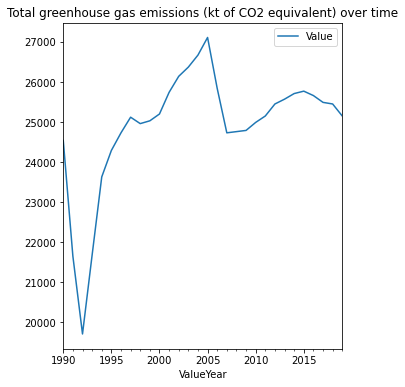

In [63]:
build_graphs('Total greenhouse gas emissions (kt of CO2 equivalent)')


<ipython-input-59-d6f961462628>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = [float(i) for i in df['Value']]


Didn't converge


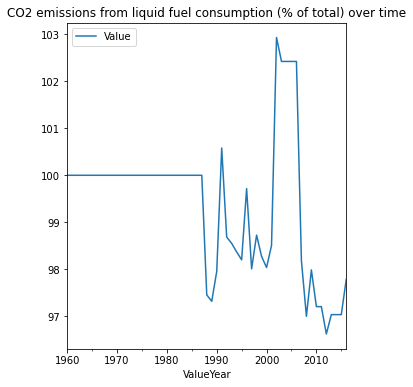

In [65]:
build_graphs('CO2 emissions from liquid fuel consumption (% of total)')


<ipython-input-59-d6f961462628>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = [float(i) for i in df['Value']]


Didn't converge


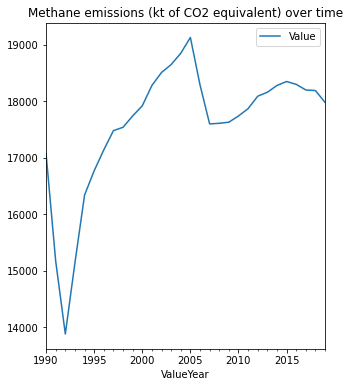

In [66]:
build_graphs('Methane emissions (kt of CO2 equivalent)')

In [53]:
climate_dff['Indicator Name'].unique()



array(['Average precipitation in depth (mm per year)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Methane emissions (kt of CO2 equivalent)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Terrestrial and marine protected areas (% of total territorial area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)'],
      dtype=object)

In [19]:
def get_df(variable):
    df = climate_dff.loc[climate_dff['Indicator Name'] == '{}'.format(variable)]
    df = df[['Value', 'ValueYear']]
    df.set_index('ValueYear')
    df['Value'] = [int(i) for i in df['Value']]
    return df

In [20]:
get_df('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)')

,Value,ValueYear


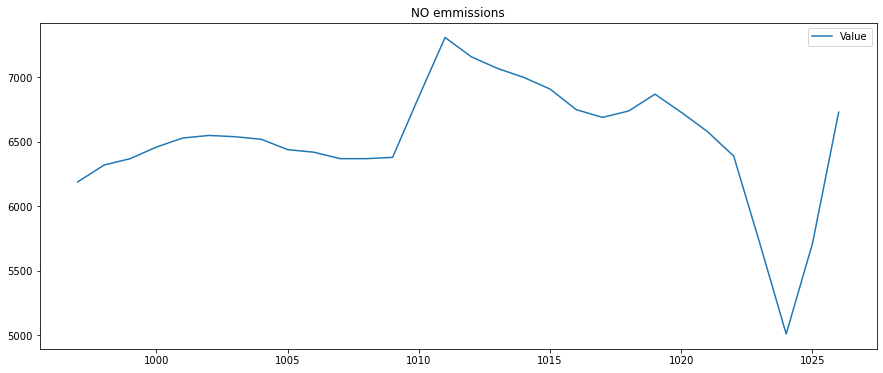

In [12]:
get_df('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)').plot(figsize=(15,6))
plt.title("NO emmissions")
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(get_df('Average precipitation in depth (mm per year)').plot(figsize=(15,6)))
# axs[0, 0].set_title('Axis [0,0]')
# axs[0, 1].plot(climate_df['CO2 emissions from liquid fuel consumption (% of total)'], y, 'tab:orange')
# axs[0, 1].set_title('Axis [0,1]')
# axs[1, 0].plot(climate_df['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'], y, 'tab:green')
# axs[1, 0].set_title('Axis [1,0]')
# axs[1, 1].plot(climate_df['Methane emissions (kt of CO2 equivalent)'], y, 'tab:red')
# axs[1, 1].set_title('Axis [1,1]')


In [ ]:
'''------------SECTION FINAL EVALUATION TRIAL--------------'''
X = df_trial[best_model_columns].values
y = df_trial['next_prevalence'].values

#If there is only one explanatory variable, the values need to be reshaped for the model
if len(best_model_columns) == 1:
	X = X.reshape(-1, 1)

#Peform evaluation on full data
Xtrain = X[:10]
ytrain = y[:10]
Xtest = X[10:]
ytest = y[10:]

clf = RandomForestRegressor(n_estimators=best_model_trees, max_depth=best_model_depth, random_state=0)
clf.fit(Xtrain, ytrain)
predictions = clf.predict(Xtest)

#Calculate MAE
MAE = mean_absolute_error(ytest, predictions)

#Generate boolean values for increase or decrease in prevalence. 0 if next prevalence is smaller than current prevalence, 1 otherwise.
increase           = [0 if x<y else 1 for x in df_trial.iloc[10:]['next_prevalence'] for y in df_trial.iloc[10:]['prevalence']]
predicted_increase = [0 if x<y else 1 for x in predictions                      for y in df_trial.iloc[10:]['prevalence']]

#Calculate accuracy of predicted boolean increase/decrease
acc = accuracy_score(increase, predicted_increase)

#Print model parameters
print('no. of trees: ' + str(best_model_trees) + '\nmax_depth: ' + str(best_model_depth) + '\ncolumns: ' + str(best_model_columns))

#Print model scores
print(MAE, acc)







'''------------SECTION RANDOM FOREST CROSS VALIDATION TRIAL--------------'''
#WARNING: this process can take some time, since there are a lot of hyperparameters to investigate. The search space can be manually reduced to speed up the process.

#Create empty list to store model scores
parameter_scores = []

#Define target and explanatory variables
X = df_trial.drop(columns = ['increase', 'increase_numeric', 'date', 'district', 'prevalence', 'next_prevalence']) #Note that these columns are dropped, the remaining columns are used as explanatory variables
y = df_trial['next_prevalence'].values

for num_trees in range(num_trees_min, num_trees_max):
    
    for depth in range(depth_min, depth_max):
        
        #Investigate every subset of explanatory variables
        for features in subsets(X.columns):
        
            #First CV split. The 99 refers to the first 3 observations for the 33 districts in the data.
            Xtrain = X[:2][features].copy().values
            ytrain = y[:2]
            Xtest = X[2:10][features].copy().values
            ytest = y[2:10]

            #Create a RandomForestRegressor with the selected hyperparameters and random state 0.
            clf = RandomForestRegressor(n_estimators=num_trees, max_depth=depth, random_state=0)

            #Fit to the training data
            clf.fit(Xtrain, ytrain)

            #Make a prediction on the test data
            predictions = clf.predict(Xtest)

            #Calculate mean absolute error
            MAE1 = mean_absolute_error(ytest, predictions)


            #Second CV split. The 132 refers to the first 4 observations for the 33 districts in the data.
            Xtrain = X[:10][features].copy().values
            ytrain = y[:10]
            Xtest = X[10:20][features].copy().values
            ytest = y[10:20]

            #Create a RandomForestRegressor with the selected hyperparameters and random state 0.
            clf = RandomForestRegressor(n_estimators=num_trees, max_depth=depth, random_state=0)

            #Fit to the training data
            clf.fit(Xtrain, ytrain)

            #Make a prediction on the test data
            predictions = clf.predict(Xtest)

            #Calculate mean absolute error
            MAE2 = mean_absolute_error(ytest, predictions)

            #Calculate the mean MAE over the two folds
            mean_MAE = (MAE1 + MAE2)/2

            #Store the mean MAE together with the used hyperparameters in list 
            parameter_scores.append((mean_MAE, num_trees, depth, features))

#Sort the models based on score and retrieve the hyperparameters of the best model
parameter_scores.sort(key=lambda x: x[0])
best_model_score = parameter_scores[0][0]
best_model_trees = parameter_scores[0][1]
best_model_depth = parameter_scores[0][2]
best_model_columns = list(parameter_scores[0][3])